# CHEKURI NAVEEN KUMAR

### TASK 1: Prediction Using Supervised ML

#### by Simple Linear Regression method

In [9]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Import data 

url="http://bit.ly/w-data"
df=pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
#To check number of rows & columns
df.shape
#For overall information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### DATA VISUALIZATION

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

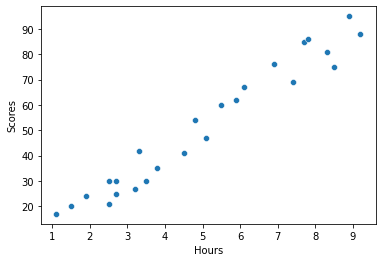

In [13]:
#Plot the data

sns.scatterplot(x=df['Hours'], y=df['Scores'])

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

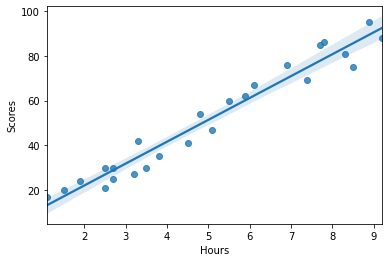

In [14]:
#Regression plot for better visualization

sns.regplot(x=df['Hours'], y=df['Scores'])

In [15]:
#To check the correlation between Hours and Scores

df.corr()


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### SEPARATE FEATURE AND TARGET VARIABLE

In [16]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

#### TRAIN-TEST SPLIT

In [17]:
#Split the data into Train and Test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state =0)

#### MODEL BUILDING

In [18]:
#Train the model

from sklearn.linear_model import LinearRegression
Reg = LinearRegression()
Reg = Reg.fit(X_train,y_train)

In [19]:
print(Reg.coef_),print(Reg.intercept_)

[9.91065648]
2.0181600414346974


(None, None)

THE MODEL EQUATION IS:

Scores= 2.0181600414346974 + 9.91065648*Hours

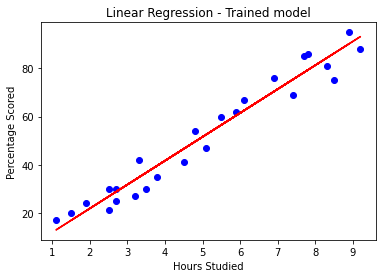

In [20]:
#Plotting the regression line for trained data

line = Reg.coef_*X+Reg.intercept_
plt.title("Linear Regression - Trained model")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.scatter(X,y,color ='Blue')
plt.plot(X,line,color='Red')
plt.show()

In [21]:
#Predict the value for test dataset

y_pred = Reg.predict(X_test)
y_pred


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

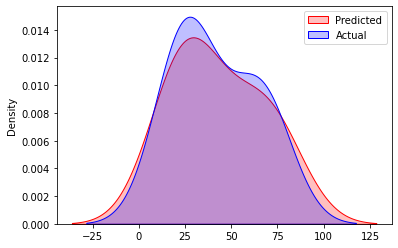

In [22]:
# Actual Vs Predicted distribution plot 

sns.kdeplot(y_pred, color="red", shade=True, label="Predicted")
sns.kdeplot(y_test, color="blue", shade=True, label = "Actual")
plt.legend()


In [23]:
# R^2 determination

from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
print("R-squared is:", R2)

R-squared is: 0.9454906892105355


#### The R-squared value is approximately 0.95, which means that 95% so, we can say that this model was good fit

In [24]:
#Predicting the Score for 9.25 hours

hours = np.array(9.25).reshape((-1, 1))
own_pred = Reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737535


#### We can conlude that, here if the student studies for 9.25 hrs/day, that student will be able to score 93.69 marks.